### 라플라시안과 제로크로싱 비교

In [4]:
import cv2
import numpy as np

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
lap = cv2.Laplacian(blur, cv2.CV_32F)

cv2.imshow('src', src)

ret, edge = cv2.threshold(np.abs(lap), 10, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)
cv2.imshow('edge', edge)

def SGN(x):
    if x >= 0:
        sign = 1
    else:
        sign = -1
    return sign

def zeroCrossing(lap):
    height, width = lap.shape
    Z = np.zeros(lap.shape, dtype=np.uint8)
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            neighbors =[lap[y-1, x], lap[y+1, x],
                        lap[y, x-1], lap[y, x+1],
                        lap[y-1, x-1], lap[y-1, x+1],
                        lap[y+1, x-1], lap[y+1, x+1]]
            mValue = min(neighbors)
            if SGN(lap[y, x]) != SGN(mValue):
                Z[y, x] = 255
    return Z

edgeZ = zeroCrossing(lap)
cv2.imshow('Zero Crossing', 255 - edgeZ)
cv2.waitKey()
cv2.destroyAllWindows()

### 박스 필터와 양방향 필터

In [4]:
import cv2
import numpy as np

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst1 = cv2.boxFilter(src, ddepth=-1, ksize=(11, 11))
dst2 = cv2.boxFilter(src, ddepth=-1, ksize=(21, 21))
dst3 = cv2.bilateralFilter(src, d=1, sigmaColor=10, sigmaSpace=10)
dst4 = cv2.bilateralFilter(src, d=-1, sigmaColor=10, sigmaSpace=10)
dst5 = cv2.blur(src, ksize=(3, 3))

kernel = np.ones(shape=(3, 3), dtype=np.uint8) / 9
dst6 = cv2.filter2D(src, cv2.CV_8U, kernel=kernel)

kernel2 = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]]) # 이렇게 설정한 경우에는 타입을 따로 안 줌
dst7 = cv2.filter2D(src, cv2.CV_8U, kernel=kernel2)

# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)
# cv2.imshow('dst5', dst5)
cv2.imshow('dst6', dst6)
cv2.imshow('dst7', dst7)
cv2.waitKey()
cv2.destroyAllWindows()

### 6.2 미디안, 블러, 가우시안

In [8]:
import cv2
import numpy as np

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst1 = cv2.medianBlur(src, ksize=7)
dst2 = cv2.blur(src, ksize=(7, 7))
dst3 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
dst4 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=10.0)

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)
cv2.waitKey()
cv2.destroyAllWindows()

### 소벨, 라플라시안

float32
int32
-2.0 2.0 -2.0 2.0


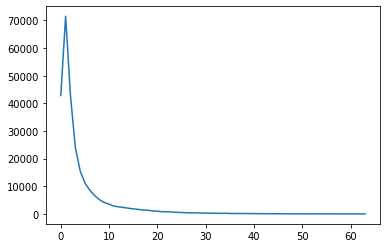

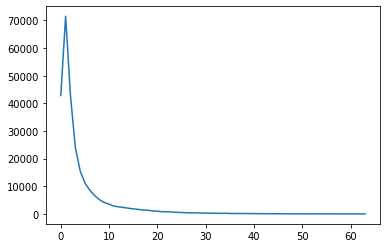

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize=3)

mag = cv2.magnitude(gx, gy)
dst = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

kernelX = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

kernelY = np.array([[-1, -2, -1], 
                   [0, 0, 0],
                   [1, 2, 1]])

print(kernelX.dtype)
print(kernelY.dtype)

min1, max1, _, _ = cv2.minMaxLoc(kernelX)
min2, max2, _, _ = cv2.minMaxLoc(kernelY)
print(min1, max1, min2, max2)

gx2 = cv2.filter2D(src, cv2.CV_32F, kernelX)
gy2 = cv2.filter2D(src, cv2.CV_32F, kernelY)

mag2 = cv2.magnitude(gx2, gy2)
dst2 = cv2.normalize(mag2, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

hist1 = cv2.calcHist([dst], [0], None, [64], [0, 256])
hist2 = cv2.calcHist([dst2], [0], None, [64], [0, 256])

plt.plot(hist1)
plt.show()

plt.plot(hist2)
plt.show()

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

### 6.4 sobel 필터 엣지 방향

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/rect.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize=3)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
min, max, _, _ = cv2.minMaxLoc(angle)

ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)
cv2.imshow('edge', edge)

height, width = mag.shape[:2]
angleM = np.full((height, width, 3), (0, 0, 0), dtype=np.uint8)
for y in range(height):
    for x in range(width):
        if edge[y, x] != 0:
            if angle[y, x] == 0:
                angleM[y, x] = (0, 0, 255)
            elif angle[y, x] == 90:
                angleM[y, x] = (0, 255, 0)
            elif angle[y, x] == 180:
                angleM[y, x] = (255, 0, 0)
            elif angle[y, x] == 270:
                angleM[y, x] = (0, 255, 255)
            else:
                angleM[y, x] = (128, 128, 128)
                
cv2.imshow('angleM', angleM)
cv2.waitKey()
cv2.destroyAllWindows()

### laplacian 필터

In [3]:
import cv2
import numpy as np

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, (7, 7), 0.0)
cv2.imshow('src', src)
cv2.imshow('blur', blur)

lap = cv2.Laplacian(src, cv2.CV_32F)
min, max, _, _ = cv2.minMaxLoc(lap)
dst = cv2.convertScaleAbs(lap)
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('lap', lap)
cv2.imshow('dst', dst)

lap2 = cv2.Laplacian(blur, cv2.CV_32F)
min2, max2, _, _ = cv2.minMaxLoc(lap2)
dst2 = cv2.convertScaleAbs(lap2)
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('lap2', lap2)
cv2.imshow('dst2', dst2)

print(min, max, min2, max2)

cv2.waitKey()
cv2.destroyAllWindows()

-239.0 189.0 -35.0 30.0


### 6.7 filter2D

In [5]:
import cv2
import numpy as np

src = cv2.imread('c:/data/rect.jpg', cv2.IMREAD_GRAYSCALE)

kx, ky = cv2.getDerivKernels(1, 0, ksize=3)
sobelX = ky.dot(kx.T)

print(kx)
print(ky)
print(kx.T)
print(sobelX)
print()

gx = cv2.filter2D(src, cv2.CV_32F, sobelX)

kx, ky = cv2.getDerivKernels(0, 1, ksize=3)
sobelY = ky.dot(kx.T)

print(kx)
print(ky)
print(kx.T)
print(sobelY)

gy = cv2.filter2D(src, cv2.CV_32F, sobelY)

mag = cv2.magnitude(gx, gy)
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('edge', edge)
cv2.waitKey()
cv2.destroyAllWindows()

[[-1.]
 [ 0.]
 [ 1.]]
[[1.]
 [2.]
 [1.]]
[[-1.  0.  1.]]
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]

[[1.]
 [2.]
 [1.]]
[[-1.]
 [ 0.]
 [ 1.]]
[[1. 2. 1.]]
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


### erode() 침식, dilate() 팽창, 모폴로지 연산

* dilate -> erode / closing
* erode -> dilate / opening
* 침식은 어두운 부분의 노이즈를 제거하는 효과가 있고 팽창은 밝은 부분의 노이즈를 제거하는 효과가 있다

In [6]:
import cv2
import numpy as np

src = cv2.imread('c:/data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3, 3))
erode = cv2.erode(src, kernel, iterations=5) # iterations은 실행 횟수
dilate = cv2.dilate(src, kernel, iterations=5) 
erode2 = cv2.erode(dilate, kernel, iterations=7)

cv2.imshow('src', src)
cv2.imshow('erode1', erode)
cv2.imshow('dilate', dilate)
cv2.imshow('erode2', erode2)
cv2.waitKey()
cv2.destroyAllWindows()



### morphologyEx()

* gradient = dilate - erode (윤곽선 강조)
* tophat = src - opening (밝은 부분 강조)
* blackhat = src - closing (어두운 부분 강조)

In [22]:
import cv2
import numpy as np

src = cv2.imread('c:/data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3, 3))

closing = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernel, iterations=5)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=5)

# 그레디언트 = 팽창 - 침식
# 윤곽선 강조
gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel, iterations=5)

# 탑햇 = 원본 - 열림
# 밝은 부분을 강조
tophat = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernel, iterations=5)

# 블랙햇 = 닫힘 - 원본
# 어두운 부분을 강조
blackhat = cv2.morphologyEx(src, cv2.MORPH_BLACKHAT, kernel, iterations=5)

cv2.imshow('src', src)
cv2.imshow('closing', closing)
cv2.imshow('opening', opening)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat', tophat)
cv2.imshow('blackhat', blackhat)
cv2.waitKey()
cv2.destroyAllWindows()

### 템플릿 매칭

In [2]:
# 0612.py
import cv2
import numpy as np

src   = cv2.imread('c:/data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
tmp_A   = cv2.imread('c:/data/A.bmp', cv2.IMREAD_GRAYSCALE)
tmp_S   = cv2.imread('c:/data/S.bmp', cv2.IMREAD_GRAYSCALE)
tmp_b   = cv2.imread('c:/data/b.bmp', cv2.IMREAD_GRAYSCALE)
dst  = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)  # 출력 표시 영상

#1
R1 = cv2.matchTemplate(src, tmp_A, cv2.TM_SQDIFF_NORMED)
minVal, _, minLoc, _ = cv2.minMaxLoc(R1)
print('TM_SQDIFF_NORMED:', minVal, minLoc)

h, w = tmp_A.shape[:2]
cv2.rectangle(dst, minLoc, (minLoc[0]+w, minLoc[1]+h), (255, 0, 0), 2)

#2
R2 = cv2.matchTemplate(src, tmp_S, cv2.TM_CCORR_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R2)
print('TM_CCORR_NORMED:', maxVal, maxLoc)
h, w = tmp_S.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+w, maxLoc[1]+h), (0, 255, 0), 2)

#3
R3 = cv2.matchTemplate(src, tmp_b, cv2.TM_CCOEFF_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R3)
print('TM_CCOEFF_NORMED:', maxVal, maxLoc)
h, w = tmp_b.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+w, maxLoc[1]+h), (0, 0, 255), 2)

cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


TM_SQDIFF_NORMED: 3.929205263375479e-07 (18, 20)
TM_CCORR_NORMED: 1.0 (280, 146)
TM_CCOEFF_NORMED: 1.0 (92, 280)
